[Reference](https://medium.com/intuitive-machine-learning/decision-trees-concepts-with-iris-dataset-304648b961f5)

# Import libraries

In [7]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#scikit learn decision tree model trainig 
from sklearn import tree
# evaluation for multi class classification
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()  # load iris dataset
x = iris.data
y = iris.target
d = [{"sepal_length":row[0], 
      "sepal_width":row[1], 
      "petal_length":row[2], 
      "petal_width":row[3]} for row in x]
df = pd.DataFrame(d) # construct dataframe
df["types"] = y # assign types
df = df.sample(frac=1.0) # random shuffle rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
21,5.1,3.7,1.5,0.4,0
100,6.3,3.3,6.0,2.5,2
138,6.0,3.0,4.8,1.8,2
135,7.7,3.0,6.1,2.3,2
149,5.9,3.0,5.1,1.8,2


# Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


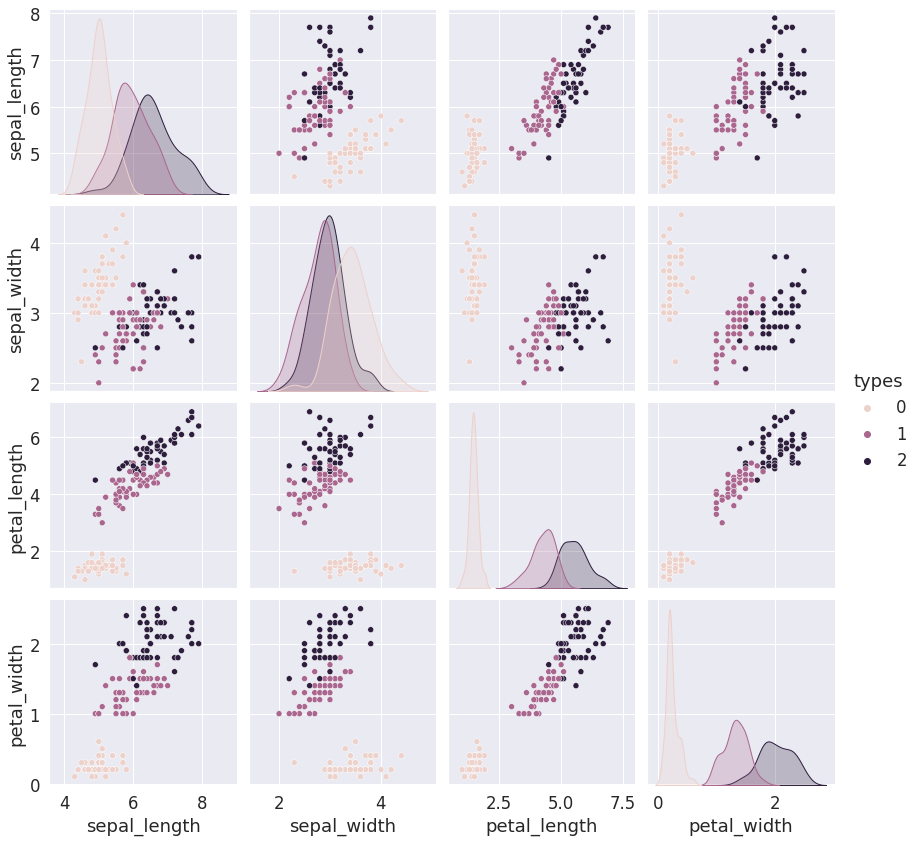

In [5]:
sns.set(font_scale=1.5)
sns.pairplot(df,hue="types",size=3);
plt.show()

# Split the dataset

In [6]:
# train test split, ratio = 0.8
features = df[["sepal_length","sepal_width","petal_length","petal_width"]]
types = df["types"]
train_features, test_features, train_types, test_types = train_test_split(features,types,train_size=0.8, random_state=1)

# Training the model

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_types)

In [9]:
prediction = clf.predict(test_features)

In [10]:
print(classification_report(test_types, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         7
       type1       0.89      0.89      0.89         9
       type2       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

